In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

#reading the data
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = list(df.select_dtypes(include=numerics).columns)

# Remove outliers from all columns
df = df[(np.abs(stats.zscore(df[numeric_columns])) < 3).all(axis=1)]


<Axes: ylabel='Density'>

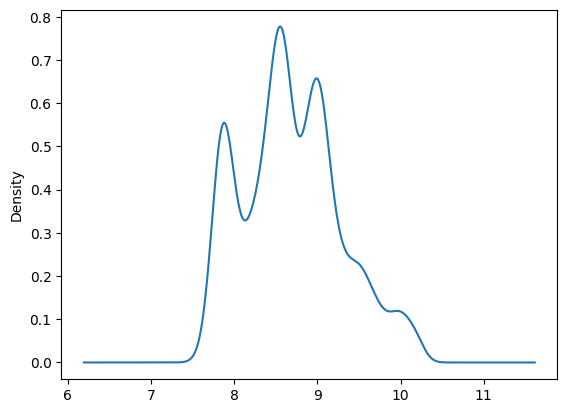

In [4]:
df['Customer Lifetime Value'] = np.log(df['Customer Lifetime Value'])

df['Customer Lifetime Value'].plot(kind='kde')

In [5]:
df_min = 7.54856002289194
df['Customer Lifetime Value'].min()

7.54856002289194

In [6]:
df_max = 11.33050847790295
df['Customer Lifetime Value'].max()

10.258046425024043

In [7]:
# Searching for NaN values
dropnans = df.dropna()
dropnans

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington                 7.924260       No     Basic   
1     QZ44356     Arizona                 8.850738       No  Extended   
2     AI49188      Nevada                 9.464008       No   Premium   
3     WW63253  California                 8.941920       No     Basic   
4     HB64268  Washington                 7.942253       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California                10.060747       No     Basic   
9130  PK87824  California                 8.038031      Yes  Extended   
9131  TD14365  California                 9.007476       No  Extended   
9132  UP19263  California                 8.925912       No  Extended   
9133  Y167826  California                 7.867809       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor           2/24/11         Employed      F   56274  ...   
1     Bachelor           1/31/11       Unemployed      F       0  ...   
2     Bachelor           2/19/11         Employed      F   48767  ...   
3     Bachelor           1/20/11       Unemployed      M       0  ...   
4     Bachelor            2/3/11         Employed      M   43836  ...   
...        ...               ...              ...    ...     ...  ...   
9129  Bachelor           2/10/11         Employed      M   71941  ...   
9130   College           2/12/11         Employed      F   21604  ...   
9131  Bachelor            2/6/11       Unemployed      M       0  ...   
9132   College            2/3/11         Employed      M   21941  ...   
9133   College           2/14/11       Unemployed      M       0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                      1  Corporate Auto  Corporate L3            Offer1   
1                      8   Personal Auto   Personal L3            Offer3   
2                      2   Personal Auto   Personal L3            Offer1   
3                      7  Corporate Auto  Corporate L2            Offer1   
4                      1   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Bran

In [8]:
df['Response'] = pd.to_numeric(df['Response'].map({'No':1,'Yes':2}))
df['Coverage'] = pd.to_numeric(df['Coverage'].map({'Basic':1,'Extended':2,'Premium':3}))
df['Education'] = pd.to_numeric(df['Education'].map({'High School or Below':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5}))
df['Vehicle Size'] = pd.to_numeric(df['Vehicle Size'].map({'Small':1,'Medsize':2,'Large':3}))


label_encoder = LabelEncoder()
categorical_cols = ['Customer', 'State','Effective To Date', 'EmploymentStatus','Gender', 'Marital Status','Location Code',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class']


for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8470 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8470 non-null   int64  
 1   State                          8470 non-null   int64  
 2   Customer Lifetime Value        8470 non-null   float64
 3   Response                       8470 non-null   int64  
 4   Coverage                       8470 non-null   int64  
 5   Education                      8470 non-null   int64  
 6   Effective To Date              8470 non-null   int64  
 7   EmploymentStatus               8470 non-null   int64  
 8   Gender                         8470 non-null   int64  
 9   Income                         8470 non-null   int64  
 10  Location Code                  8470 non-null   int64  
 11  Marital Status                 8470 non-null   int64  
 12  Monthly Premium Auto           8470 non-null   i

In [10]:
df = df.drop(['Customer', 'Effective To Date'], axis=1)
df.corr()

State  Customer Lifetime Value  Response  \
State                          1.000000                 0.002973 -0.002030   
Customer Lifetime Value        0.002973                 1.000000  0.008747   
Response                      -0.002030                 0.008747  1.000000   
Coverage                      -0.004467                 0.200710 -0.008043   
Education                     -0.000357                -0.015488  0.018241   
EmploymentStatus              -0.004307                -0.051694 -0.011690   
Gender                        -0.005112                -0.009451  0.015157   
Income                         0.006446                 0.046370  0.013171   
Location Code                 -0.003009                 0.001041  0.002064   
Marital Status                 0.019223                -0.038295 -0.079423   
Monthly Premium Auto          -0.004200                 0.377658  0.002730   
Months Since Last Claim        0.001043                 0.005864 -0.024905   
Months Since Policy Inception  0.015501                -0.012153 -0.010857   
Number of Open Complaints     -0.005071                -0.020898 -0.021972   
Number of Policies            -0.012705                 0.239160 -0.017475   
Policy Type                    0.009518                 0.014950 -0.000504   
Policy                         0.016832                 0.010708 -0.004152   
Renew Offer Type              -0.010509                -0.098660 -0.159108   
Sales Channel                 -0.002577                -0.021978 -0.082354   
Total Claim Amount            -0.003504                 0.153537  0.025965   
Vehicle Class                  0.012117                 0.097626  0.025832   
Vehicle Size                  -0.007390                -0.010969  0.055123   

                               Coverage  Education  EmploymentStatus  \
State                         -0.004467  -0.000357         -0.004307   
Customer Lifetime Value        0.200710  -0.015488         -0.051694   
Response                      -0.008043   0.018241         -0.011690   
Coverage                       1.000000  -0.019587         -0.000708   
Education                     -0.019587   1.000000         -0.096451   
EmploymentStatus              -0.000708  -0.096451          1.000000   
Gender                        -0.014909  -0.008875          0.031341   
Income                        -0.008868   0.067189         -0.723112   
Location Code                 -0.020078  -0.017281          0.015170   
Marital Status                -0.000735  -0.094881          0.305929   
Monthly Premium Auto           0.490542  -0.020761         -0.011268   
Months Since Last Claim        0.006324   0.000815          0.010400   
Months Since Policy Inception  0.007431   0.012000          0.014443   
Number of Open Complaints     -0.004958   0.008863          0.009691   
Number of Policies            -0.009903  -0.006449          0.005384   
Policy Type                   -0.001743   0.010974         -0.000927   
Policy                        -0.007716   0.004966         -0.000123   
Renew Offer Type              -0.041496  -0.011660         -0.121852   
Sales Channel                 -0.019081   0.009112         -0.016760   
Total Claim Amount             0.264402  -0.142840          0.355467   
Vehicle Class                 -0.018903   0.000163         -0.002189   
Vehicle Size                   0.013545   0.000020          0.010124   

                                 Gender    Income  Location Code  \
State                         -0.005112  0.006446      -0.003009   
Customer Lifetime Value       -0.009451  0.046370       0.001041   
Response                       0.015157  0.013171       0.002064   
Coverage                      -0.014909 -0.008868      -0.020078   
Education                     -0.008875  0.067189      -0.017281   
EmploymentStatus               0.031341 -0.723112       0.015170   
Gender                         1.000000 -0.010147       0.002068   
Income                        -0.01014

In [11]:
# EDA done with bar plot
bar_eda = ['Customer Lifetime Value','Coverage','Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies',
       'Renew Offer Type','Total Claim Amount', 'Vehicle Class', 'Vehicle Size']

# EDA done with boxplot
box_eda = ["Customer Lifetime Value","EmploymentStatus", "Renew Offer Type", "Vehicle Class",
          "Policy", "Monthly Premium Auto", "Coverage"]

# Need to add target to these since the train test split is done later and
# only the specified variables in the function are clustered

In [12]:
# K-means clustering
# takes df, names of the variables, new variable name, number of clusters
# and whether you want a graph
# Returns dataframe with new cluster variables
def clusterize(df, names, cluster_name,n_clusters,graph=False,eda=None):

  new_df = df.copy()

  if eda != None:
    # combine the eda vars with the selected cluster vars
    combined_vars = eda + list(set(names) - set(eda))
    #print(combined_vars)

    # remove all other vars so it is just eda and cluster vars
    new_df = new_df[new_df.columns.intersection(combined_vars)]
    #print(new_df.columns)

  print(names)
  print(n_clusters)

  # Scaling variables
  X_scaled = new_df.loc[:, names]
  X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

  # creating clusters
  kmeans = KMeans(n_clusters = n_clusters,max_iter=1000)
  new_df[cluster_name] = kmeans.fit_predict(X_scaled)
  new_df[cluster_name] = label_encoder.fit_transform(new_df[cluster_name])

  # graphs
  if graph == True:
    sns.relplot(
      x="value", y="Customer Lifetime Value", hue=cluster_name, col="variable",
      height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
      data=new_df.melt(
          value_vars=names, id_vars=["Customer Lifetime Value", cluster_name],
      ),
    )

  # Dropping original vars
  new_df = new_df.drop(names, axis=1)

  return new_df

In [13]:
# graphs for finding number of clusters
def num_of_clusters(limit,df, names, cluster_name,n_clusters,graph=False):
  for i in range(2,limit):
    clusterize(df, names, cluster_name,i,True)


In [14]:
# Code used to explore different clusters (of size two)
'''
seen = df.drop(['Customer Lifetime Value'],axis=1).columns
cluster_cor = {}

for i in range(0,len(seen)):
  for j in range(i+1,len(seen)):
    if i != j:
      temp_df = clusterize(df,[seen[i],seen[j]],'Var',25,graph=False)
      combo = seen[i] + '/' + seen[j]
      cluster_cor[combo] = temp_df['Customer Lifetime Value'].corr(temp_df['Var'])

print(cluster_cor)
for keys,values in cluster_cor.items():
  if values > 0.1:
    print(values, " ",keys)
'''

'\nseen = df.drop([\'Customer Lifetime Value\'],axis=1).columns\ncluster_cor = {}\n\nfor i in range(0,len(seen)):\n  for j in range(i+1,len(seen)):\n    if i != j:\n      temp_df = clusterize(df,[seen[i],seen[j]],\'Var\',25,graph=False)\n      combo = seen[i] + \'/\' + seen[j]\n      cluster_cor[combo] = temp_df[\'Customer Lifetime Value\'].corr(temp_df[\'Var\'])\n\nprint(cluster_cor)\nfor keys,values in cluster_cor.items():\n  if values > 0.1:\n    print(values, " ",keys)\n'

In [15]:
'''
for keys,values in cluster_cor.items():
  if values > 0.1:
    words = keys.split('/')
    clusterize(df,[words[0],words[1]],'Var',25,graph=True)
'''

"\nfor keys,values in cluster_cor.items():\n  if values > 0.1:\n    words = keys.split('/')\n    clusterize(df,[words[0],words[1]],'Var',25,graph=True)\n"

In [16]:
cluster_df = df.copy()

In [17]:
cluster_df.corr()

State  Customer Lifetime Value  Response  \
State                          1.000000                 0.002973 -0.002030   
Customer Lifetime Value        0.002973                 1.000000  0.008747   
Response                      -0.002030                 0.008747  1.000000   
Coverage                      -0.004467                 0.200710 -0.008043   
Education                     -0.000357                -0.015488  0.018241   
EmploymentStatus              -0.004307                -0.051694 -0.011690   
Gender                        -0.005112                -0.009451  0.015157   
Income                         0.006446                 0.046370  0.013171   
Location Code                 -0.003009                 0.001041  0.002064   
Marital Status                 0.019223                -0.038295 -0.079423   
Monthly Premium Auto          -0.004200                 0.377658  0.002730   
Months Since Last Claim        0.001043                 0.005864 -0.024905   
Months Since Policy Inception  0.015501                -0.012153 -0.010857   
Number of Open Complaints     -0.005071                -0.020898 -0.021972   
Number of Policies            -0.012705                 0.239160 -0.017475   
Policy Type                    0.009518                 0.014950 -0.000504   
Policy                         0.016832                 0.010708 -0.004152   
Renew Offer Type              -0.010509                -0.098660 -0.159108   
Sales Channel                 -0.002577                -0.021978 -0.082354   
Total Claim Amount            -0.003504                 0.153537  0.025965   
Vehicle Class                  0.012117                 0.097626  0.025832   
Vehicle Size                  -0.007390                -0.010969  0.055123   

                               Coverage  Education  EmploymentStatus  \
State                         -0.004467  -0.000357         -0.004307   
Customer Lifetime Value        0.200710  -0.015488         -0.051694   
Response                      -0.008043   0.018241         -0.011690   
Coverage                       1.000000  -0.019587         -0.000708   
Education                     -0.019587   1.000000         -0.096451   
EmploymentStatus              -0.000708  -0.096451          1.000000   
Gender                        -0.014909  -0.008875          0.031341   
Income                        -0.008868   0.067189         -0.723112   
Location Code                 -0.020078  -0.017281          0.015170   
Marital Status                -0.000735  -0.094881          0.305929   
Monthly Premium Auto           0.490542  -0.020761         -0.011268   
Months Since Last Claim        0.006324   0.000815          0.010400   
Months Since Policy Inception  0.007431   0.012000          0.014443   
Number of Open Complaints     -0.004958   0.008863          0.009691   
Number of Policies            -0.009903  -0.006449          0.005384   
Policy Type                   -0.001743   0.010974         -0.000927   
Policy                        -0.007716   0.004966         -0.000123   
Renew Offer Type              -0.041496  -0.011660         -0.121852   
Sales Channel                 -0.019081   0.009112         -0.016760   
Total Claim Amount             0.264402  -0.142840          0.355467   
Vehicle Class                 -0.018903   0.000163         -0.002189   
Vehicle Size                   0.013545   0.000020          0.010124   

                                 Gender    Income  Location Code  \
State                         -0.005112  0.006446      -0.003009   
Customer Lifetime Value       -0.009451  0.046370       0.001041   
Response                       0.015157  0.013171       0.002064   
Coverage                      -0.014909 -0.008868      -0.020078   
Education                     -0.008875  0.067189      -0.017281   
EmploymentStatus               0.031341 -0.723112       0.015170   
Gender                         1.000000 -0.010147       0.002068   
Income                        -0.01014

In [18]:
print(df.columns)

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [19]:
def RMSE(y_true,y_pred):
  rmse = mean_squared_error(y_true,y_pred,squared=False)
  return rmse

def tr_score():
  return make_scorer(RMSE)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def formula_and_column(df):

  formula = "Customer_Lifetime_Value ~ "
  is_first = True

  for i in df.drop(['Customer_Lifetime_Value'], axis=1).columns:
    new_string = '_'.join(i.split())
    df = df.rename(columns={i:new_string})
    if is_first:
      formula = formula + new_string
      is_first = False
    else:
      formula = formula + "+" + new_string

  return df, formula

In [20]:
# models: Lasso, Elastic, GLM, Decision Tree, Random Forest, Boosted Tree
def model_tests(df, model_list):

  models = {}

  df = df.rename(columns={'Customer Lifetime Value': 'Customer_Lifetime_Value'})

  train, test = train_test_split(df, test_size=0.2)

  X = test.drop(['Customer_Lifetime_Value'], axis=1)
  y = test['Customer_Lifetime_Value']

  train_x = train.drop(['Customer_Lifetime_Value'], axis=1)
  train_y = train['Customer_Lifetime_Value']

  if "Lasso" in model_list:
    # Lasso
    clf = linear_model.Lasso(alpha=0.1)
    clf.fit(train_x, train_y)

    preds = clf.predict(train_x)

    print("Lasso Train Score: ", rmse(preds, train_y))

    preds = clf.predict(X)

    print("Lasso Test Score: ", rmse(preds, y))

    models['Lasso'] = clf

  if "Elastic" in model_list:
    # Ridge with elastic net

    e_net = ElasticNet(alpha = 1)
    e_net.fit(train_x, train_y)

    preds = e_net.predict(train_x)

    print("Elastic Net Train Score: ", rmse(preds, train_y))

    preds = e_net.predict(X)

    print("Elastic Net Test Score: ", rmse(preds, y))

    models["Elastic Net"] = e_net

  if "GLM" in model_list:
    # GLM

    df, formula = formula_and_column(df)
    df = df.rename(columns={'Customer Lifetime Value': 'Customer_Lifetime_Value'})

    train, test = train_test_split(df, test_size=0.2)

    X = test.drop(['Customer_Lifetime_Value'], axis=1)
    y = test['Customer_Lifetime_Value']

    train_x = train.drop(['Customer_Lifetime_Value'], axis=1)
    train_y = train['Customer_Lifetime_Value']

    gamma_model = smf.glm(formula=formula,
                    data=train,
                    family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()

    # now generate predictions
    ypred = gamma_model.predict(X)

    # calc rmse
    r = rmse(y, ypred)

    # now generate predictions
    ytrainpred = gamma_model.predict(train_x)

    # calc rmse
    r_train = rmse(train_y, ytrainpred)

    print("GLM Train and Test")
    display(r_train)
    display(r)

    # summary can be gotten from model in returned dictionary
    #print(gamma_model.summary())

    models['GLM'] = gamma_model

  if "Decision Tree" in model_list:
    # Decision Tree

    grid_vals = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,13,14]}
    model = DecisionTreeRegressor()

    grid_dt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_dt.fit(train_x, train_y)
    preds = grid_dt.best_estimator_.predict(X)

    print("DT Training Score: ", grid_dt.best_score_)
    print("DT Test Score: ", rmse(preds, y))
    print("DT best params: ", grid_dt.best_params_)

    models['Decision Tree'] = grid_dt

  if "Random Forest" in model_list:
    # Random Forest

    grid_vals = {'n_estimators':[100],
             'max_depth':[6,7,8,9],
             'max_leaf_nodes':[4,5,6,7,8,9],
             'max_features':["log2"]}
    model = RandomForestRegressor()

    grid_rt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_rt.fit(train_x, train_y)
    preds = grid_rt.best_estimator_.predict(X)

    rmse(preds, y)

    print("RT Training Score: ", grid_rt.best_score_)
    print("RT Test Score: ", rmse(preds, y))
    print("RT best params: ", grid_rt.best_params_)

    models["Random Forest"] = grid_rt

  if "Boosted Tree" in model_list:
    # Boosted Tree

    grid_vals = {'n_estimators':[100],
             'learning_rate':[0.05],
             'max_depth':[6,7,8,9],
             'max_leaf_nodes':[4,5,6,7,8,9],
             'max_features':["log2"]}
    model = GradientBoostingRegressor()

    grid_bt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_bt.fit(train_x, train_y)
    preds = grid_bt.best_estimator_.predict(X)


    print("BT Training Score: ", grid_bt.best_score_)
    print("BT Test Score: ", rmse(preds, y))
    print("BT best params: ", grid_bt.best_params_)

    models['Boosted Tree'] = grid_bt

  return models



In [21]:
all_models = ["Lasso", "Elastic", "GLM", "Decision Tree", "Random Forest", "Boosted Tree"]

Without The clusters

In [22]:
no_cluster_models = model_tests(df, all_models)

Lasso Train Score:  0.5274851338913005
Lasso Test Score:  0.5336183241781558
Elastic Net Train Score:  0.5463098341139438
Elastic Net Test Score:  0.5503073010773788
GLM Train and Test


0.526522374220099

0.524355940353587

DT Training Score:  0.2754221972125156
DT Test Score:  0.2747163835657383
DT best params:  {'max_depth': 3, 'max_leaf_nodes': 4}
RT Training Score:  0.42963614790914917
RT Test Score:  0.4234256452654974
RT best params:  {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.2682377766587286
BT Test Score:  0.2785975679059208
BT best params:  {'learning_rate': 0.05, 'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


In [23]:
bar_df = df[bar_eda]
no_cluster_bar_models = model_tests(bar_df, all_models)

Lasso Train Score:  0.5296991889710801
Lasso Test Score:  0.5271043272660771
Elastic Net Train Score:  0.5477430919107363
Elastic Net Test Score:  0.5454674849077435
GLM Train and Test


0.5281419197836632

0.5213924200113057

DT Training Score:  0.27506670205669603
DT Test Score:  0.27148580902775116
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 13}
RT Training Score:  0.38644038199318936
RT Test Score:  0.37637003894636156
RT best params:  {'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.22977312124087446
BT Test Score:  0.2103381804485494
BT best params:  {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


In [24]:
box_df = df[box_eda]
no_cluster_box_models = model_tests(box_df, all_models)

Lasso Train Score:  0.5500747819706022
Lasso Test Score:  0.5360020838041472
Elastic Net Train Score:  0.5504064078645954
Elastic Net Test Score:  0.5364929409229066
GLM Train and Test


0.5441386540234536

0.5480791554234465

DT Training Score:  0.547480847935481
DT Test Score:  0.5512918570462456
DT best params:  {'max_depth': 7, 'max_leaf_nodes': 4}
RT Training Score:  0.5506003617195525
RT Test Score:  0.5527476656743491
RT best params:  {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.5409004660148319
BT Test Score:  0.5436582735045553
BT best params:  {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


Vehicle Cluster

['Vehicle Class', 'Vehicle Size']
16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.5293875570581985
Lasso Test Score:  0.5259674779485092
Elastic Net Train Score:  0.5479404699401815
Elastic Net Test Score:  0.5435101841794305
GLM Train and Test


0.5262313500743581

0.5244605256239789

DT Training Score:  0.27644563249015375
DT Test Score:  0.2727265836086751
DT best params:  {'max_depth': 11, 'max_leaf_nodes': 4}
RT Training Score:  0.42965716337803916
RT Test Score:  0.4319259385640264
RT best params:  {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.25939488861641946
BT Test Score:  0.2792878570542617
BT best params:  {'learning_rate': 0.05, 'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


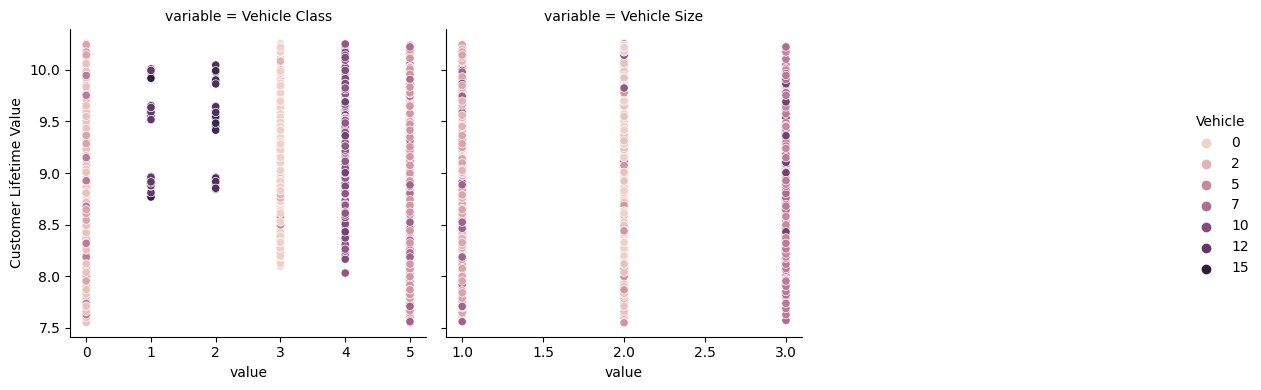

In [25]:
vehicle_df = clusterize(cluster_df,['Vehicle Class','Vehicle Size'],'Vehicle',
                        16,graph=True)
vehicle_cluster_models = model_tests(vehicle_df, all_models)

['Vehicle Class', 'Vehicle Size']
16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.5286402586513729
Lasso Test Score:  0.5319186577462277
Elastic Net Train Score:  0.5467424991321145
Elastic Net Test Score:  0.5503626108237503
GLM Train and Test


0.5254366181217448

0.5332586718821495

DT Training Score:  0.2736962105226267
DT Test Score:  0.2858050072817645
DT best params:  {'max_depth': 12, 'max_leaf_nodes': 4}
RT Training Score:  0.37042103599294685
RT Test Score:  0.377135124033193
RT best params:  {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.21771364310908026
BT Test Score:  0.20715682626530993
BT best params:  {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


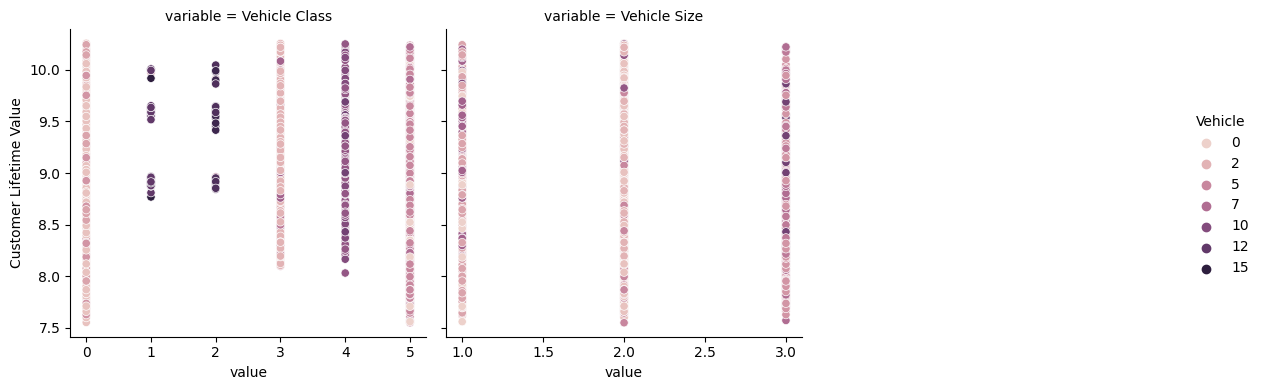

In [26]:
vehicle_bar_df = clusterize(cluster_df,['Vehicle Class','Vehicle Size'],
                            'Vehicle',16,graph=True,eda=bar_eda)
vehicle_bar_cluster_models = model_tests(vehicle_bar_df, all_models)

['Vehicle Class', 'Vehicle Size']
16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.5443299445588061
Lasso Test Score:  0.5589019559110834
Elastic Net Train Score:  0.5446534979191471
Elastic Net Test Score:  0.5593026511327637
GLM Train and Test


0.543827182117508

0.5482107371752831

DT Training Score:  0.5477655146238392
DT Test Score:  0.5529695031945281
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 8}
RT Training Score:  0.5509276599302467
RT Test Score:  0.5552175589367137
RT best params:  {'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.5417207886934614
BT Test Score:  0.54383220932795
BT best params:  {'learning_rate': 0.05, 'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


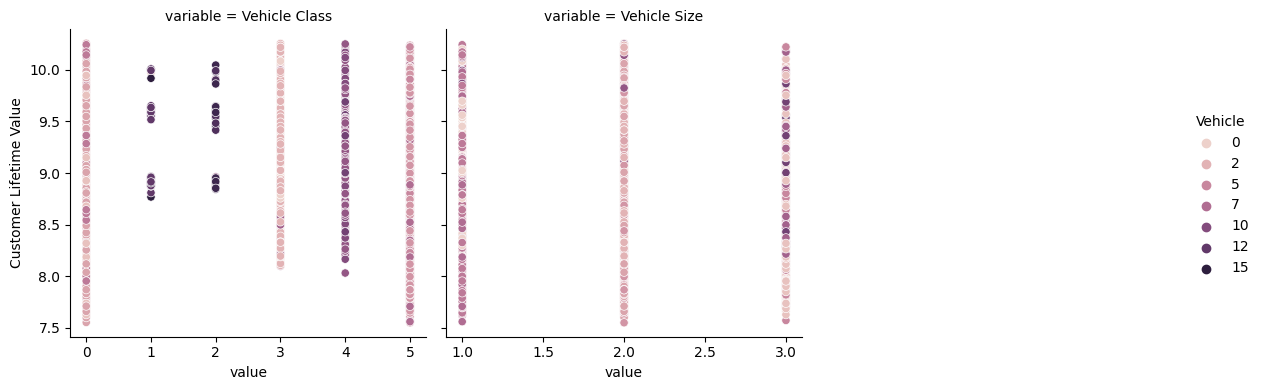

In [27]:
vehicle_box_df = clusterize(cluster_df,['Vehicle Class','Vehicle Size'],
                            'Vehicle',16,graph=True,eda=box_eda)
vehicle_box_cluster_models = model_tests(vehicle_box_df, all_models)

Cost Cluster

['Total Claim Amount', 'Months Since Last Claim']
20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.532454999127042
Lasso Test Score:  0.5165036830691455
Elastic Net Train Score:  0.549390253227012
Elastic Net Test Score:  0.5372390524366766
GLM Train and Test


0.5230075297641774

0.5386609000795284

DT Training Score:  0.27445250745077454
DT Test Score:  0.27343210668032186
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 5}
RT Training Score:  0.42418731487373307
RT Test Score:  0.40185532687742836
RT best params:  {'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.255606371824826
BT Test Score:  0.2877253024648493
BT best params:  {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


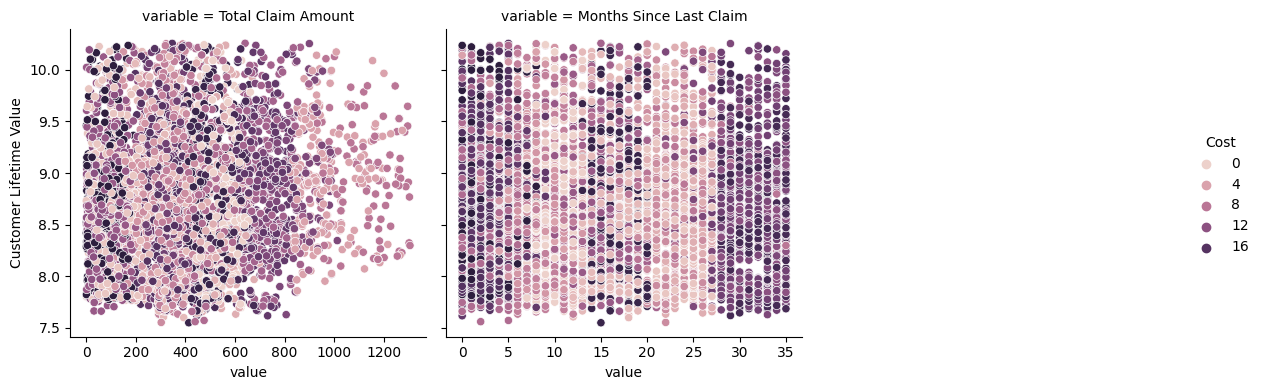

In [28]:
cost_df = clusterize(cluster_df,['Total Claim Amount','Months Since Last Claim'],
                     'Cost',20,graph=True)

cost_cluster_models = model_tests(cost_df, all_models)

['Total Claim Amount', 'Months Since Last Claim']
20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.5306897107055457
Lasso Test Score:  0.5263960960459787
Elastic Net Train Score:  0.5480762298815569
Elastic Net Test Score:  0.5455728407458285
GLM Train and Test


0.5267433316238431

0.5294117864600256

DT Training Score:  0.2734461546505496
DT Test Score:  0.27666101001392923
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 13}
RT Training Score:  0.3758747673439582
RT Test Score:  0.39063527393971786
RT best params:  {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.2174763146754565
BT Test Score:  0.23475637606093333
BT best params:  {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


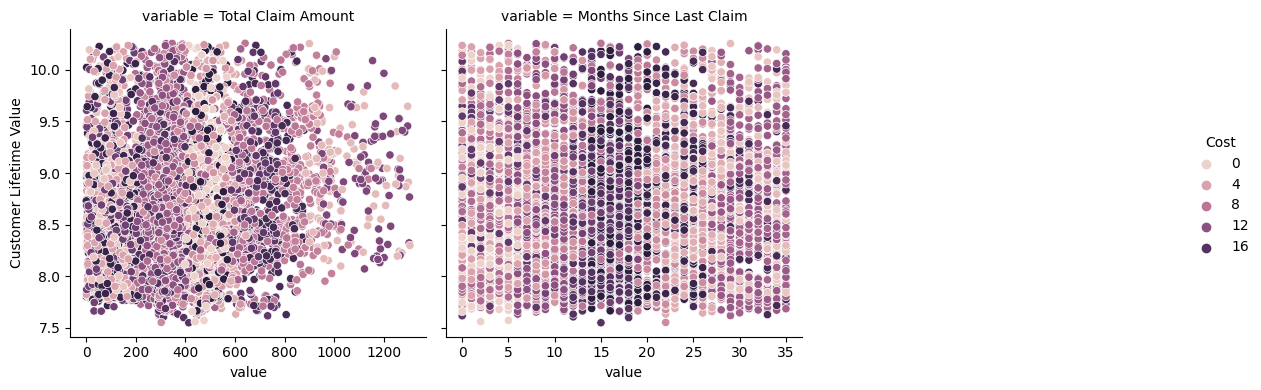

In [29]:
cost_bar_df = clusterize(cluster_df,['Total Claim Amount','Months Since Last Claim'],
                     'Cost',20,graph=True,eda=bar_eda)
cost_bar_cluster_models = model_tests(cost_bar_df, all_models)

['Total Claim Amount', 'Months Since Last Claim']
20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.5505545950308913
Lasso Test Score:  0.5339840107444453
Elastic Net Train Score:  0.5508785422209311
Elastic Net Test Score:  0.5343340541062752
GLM Train and Test


0.5413750475099219

0.5583025106898593

DT Training Score:  0.5467650602142823
DT Test Score:  0.5598416024756817
DT best params:  {'max_depth': 6, 'max_leaf_nodes': 4}
RT Training Score:  0.5492186043528618
RT Test Score:  0.56861877210221
RT best params:  {'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.5388867322598566
BT Test Score:  0.555051697336067
BT best params:  {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


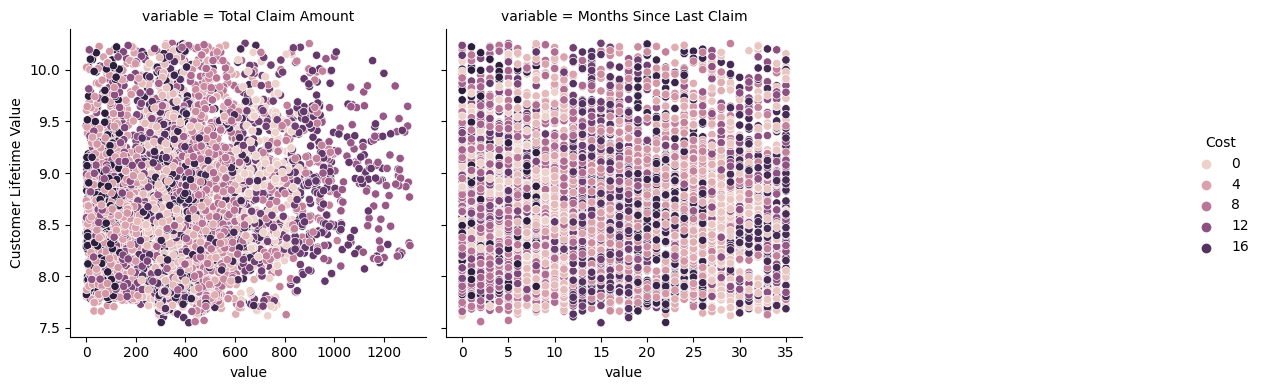

In [30]:
cost_box_df = clusterize(cluster_df,['Total Claim Amount','Months Since Last Claim'],
                     'Cost',20,graph=True,eda=box_eda)
cost_box_cluster_models = model_tests(cost_box_df, all_models)

Area Cluster

['State', 'Location Code']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Lasso Train Score:  0.5238073416568972
Lasso Test Score:  0.5480969409165107
Elastic Net Train Score:  0.5425020215764622
Elastic Net Test Score:  0.5642957031071878
GLM Train and Test


0.5262316593960414

0.5245151357124586

DT Training Score:  0.2744054689778558
DT Test Score:  0.27280362131771035
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 11}
RT Training Score:  0.42493421548228627
RT Test Score:  0.41756494218991896
RT best params:  {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.26462430849844537
BT Test Score:  0.25482972784541347
BT best params:  {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


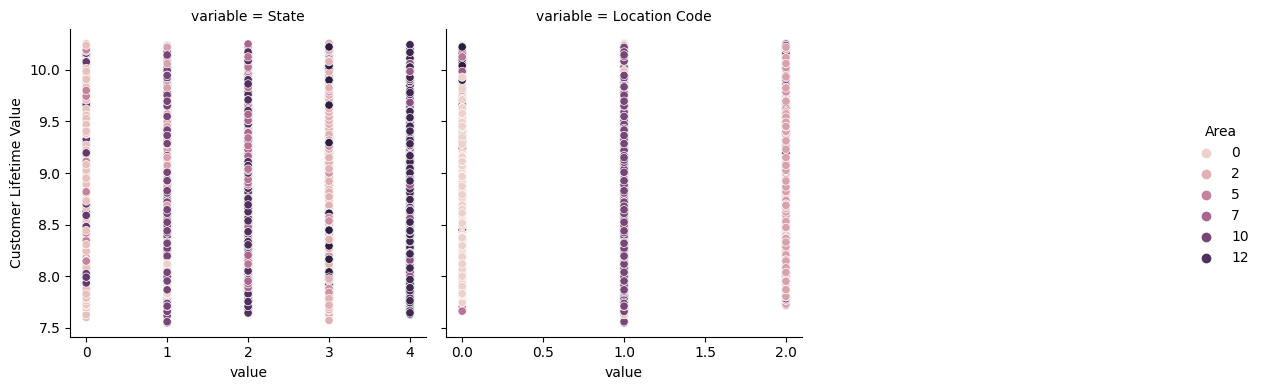

In [31]:
area_df = clusterize(cluster_df,['State','Location Code'],'Area',60,graph=True)
area_cluster_models = model_tests(area_df, all_models)

['State', 'Location Code']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Lasso Train Score:  0.5296100473858586
Lasso Test Score:  0.5267875900492542
Elastic Net Train Score:  0.5483114603371044
Elastic Net Test Score:  0.5429196651970526
GLM Train and Test


0.5271633843637029

0.5243499718532763

DT Training Score:  0.2743281337961538
DT Test Score:  0.2779545205026636
DT best params:  {'max_depth': 10, 'max_leaf_nodes': 4}
RT Training Score:  0.3967862396711258
RT Test Score:  0.39331314220440816
RT best params:  {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.2343759674848441
BT Test Score:  0.2397951690361332
BT best params:  {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


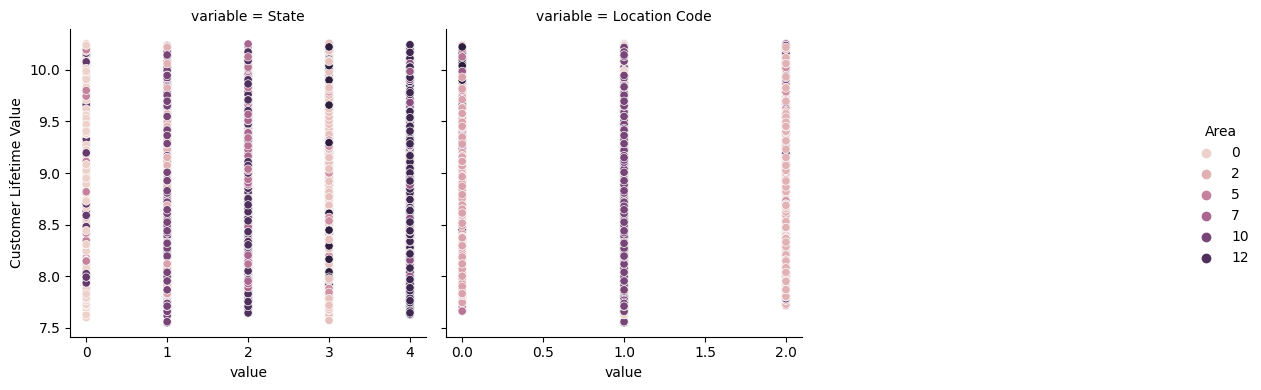

In [32]:
area_bar_df = clusterize(cluster_df,['State','Location Code'],'Area',
                         60,graph=True,eda=bar_eda)
area_bar_cluster_models = model_tests(area_bar_df, all_models)

['State', 'Location Code']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Lasso Train Score:  0.5469498173666053
Lasso Test Score:  0.5484783082121112
Elastic Net Train Score:  0.5472806875490187
Elastic Net Test Score:  0.5483443481268596
GLM Train and Test


0.5403622987439991

0.5623239722642562

DT Training Score:  0.5446392094019674
DT Test Score:  0.5655376223038373
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 7}
RT Training Score:  0.5486733187638634
RT Test Score:  0.5670067175323398
RT best params:  {'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.5373424375383655
BT Test Score:  0.5588266980187665
BT best params:  {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


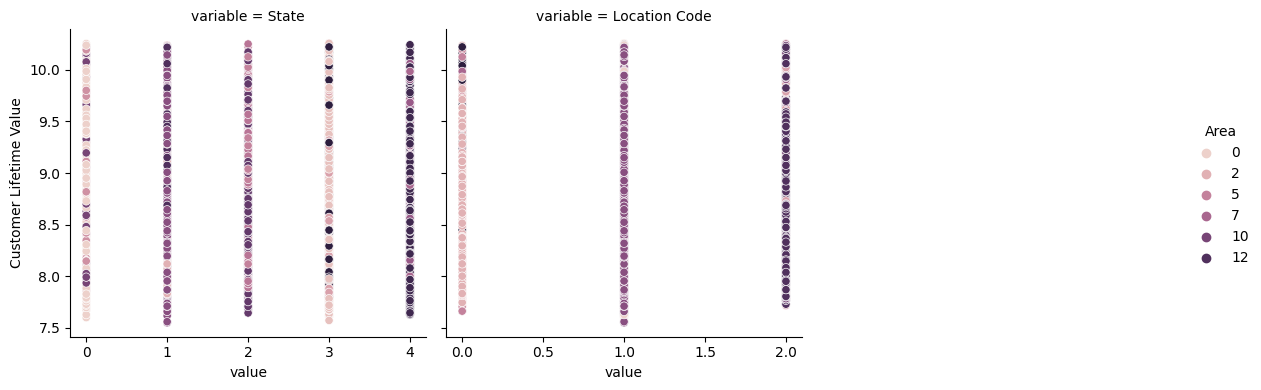

In [33]:
area_box_df = clusterize(cluster_df,['State','Location Code'],'Area',
                         60,graph=True,eda=box_eda)
area_box_cluster_models = model_tests(area_box_df, all_models)

Policies Cluster

['Policy', 'Policy Type', 'Number of Policies']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.545947859665079
Lasso Test Score:  0.5486924272114668
Elastic Net Train Score:  0.5465108407083845
Elastic Net Test Score:  0.5486830186325167
GLM Train and Test


0.5448042943474333

0.5418149958394868

DT Training Score:  0.5274791871508181
DT Test Score:  0.5207597067036076
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 4}
RT Training Score:  0.5335249652733343
RT Test Score:  0.5209034694964144
RT best params:  {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.44427227381903134
BT Test Score:  0.4434952048143901
BT best params:  {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


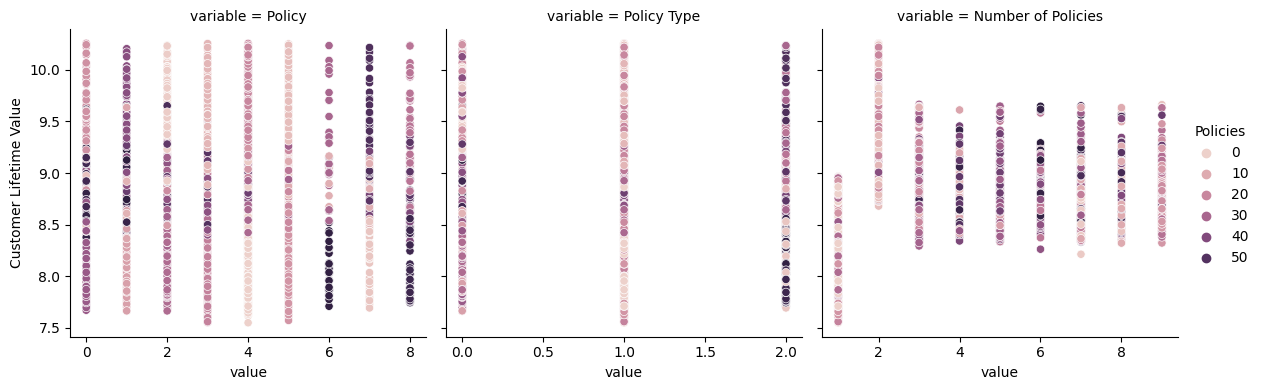

In [34]:
policies_df = clusterize(cluster_df,['Policy','Policy Type','Number of Policies'],
                         'Policies',60,graph=True)
policies_cluster_models = model_tests(policies_df, all_models)

['Policy', 'Policy Type', 'Number of Policies']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.5394121404652346
Lasso Test Score:  0.5343565097901218
Elastic Net Train Score:  0.5410448776407578
Elastic Net Test Score:  0.5359300522234262
GLM Train and Test


0.5337990476311055

0.5483964998736673

DT Training Score:  0.4922690255969059
DT Test Score:  0.5070227896367315
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 10}
RT Training Score:  0.5040898654587392
RT Test Score:  0.5117078931035202
RT best params:  {'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.42023176318004596
BT Test Score:  0.4403571996437766
BT best params:  {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


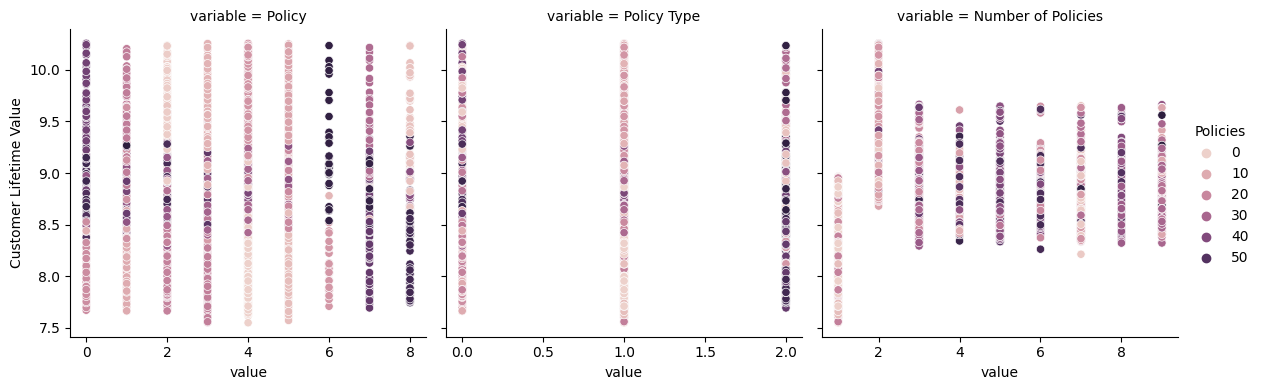

In [35]:
policies_bar_df = clusterize(cluster_df,['Policy','Policy Type','Number of Policies'],
                         'Policies',60,graph=True,eda=bar_eda)
policies_bar_cluster_models = model_tests(policies_bar_df, all_models)

['Policy', 'Policy Type', 'Number of Policies']
60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.5475789850549211
Lasso Test Score:  0.5401365238626235
Elastic Net Train Score:  0.5489487200699233
Elastic Net Test Score:  0.5408554779591234
GLM Train and Test


0.5456616654977031

0.5366514698260766

DT Training Score:  0.4122321436000605
DT Test Score:  0.4060280182284498
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 11}
RT Training Score:  0.44528364653935004
RT Test Score:  0.435641509775894
RT best params:  {'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.3388928431175944
BT Test Score:  0.33032831074364544
BT best params:  {'learning_rate': 0.05, 'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


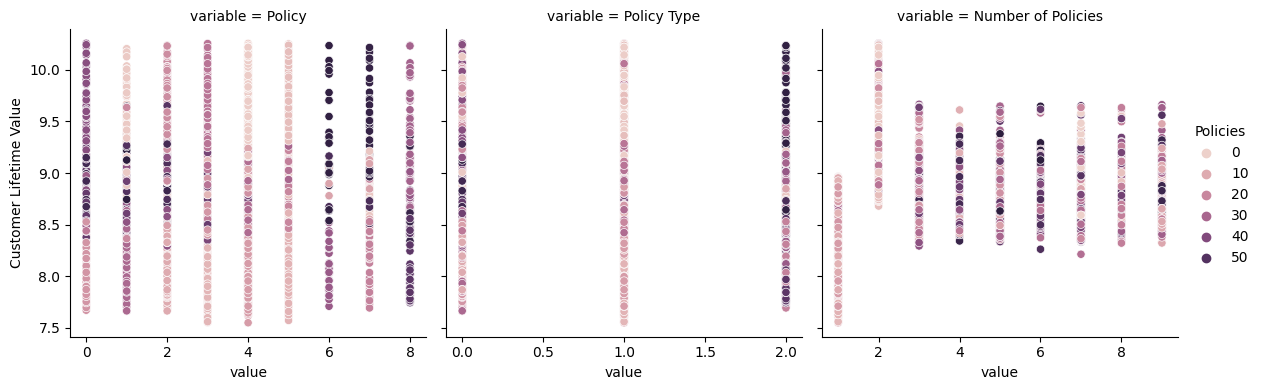

In [36]:
policies_box_df = clusterize(cluster_df,['Policy','Policy Type','Number of Policies'],
                         'Policies',60,graph=True,eda=box_eda)
policies_box_cluster_models = model_tests(policies_box_df, all_models)

Money Cluster

['Income', 'Total Claim Amount']
26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.5294485789955983
Lasso Test Score:  0.5298568243562903
Elastic Net Train Score:  0.5478691440298892
Elastic Net Test Score:  0.5468181408699633
GLM Train and Test


0.5274236158394704

0.5211406620028338

DT Training Score:  0.2784650417066158
DT Test Score:  0.2692355480704072
DT best params:  {'max_depth': 3, 'max_leaf_nodes': 4}
RT Training Score:  0.42826830322644166
RT Test Score:  0.42156274556598866
RT best params:  {'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.25638535792663236
BT Test Score:  0.26862387370413776
BT best params:  {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


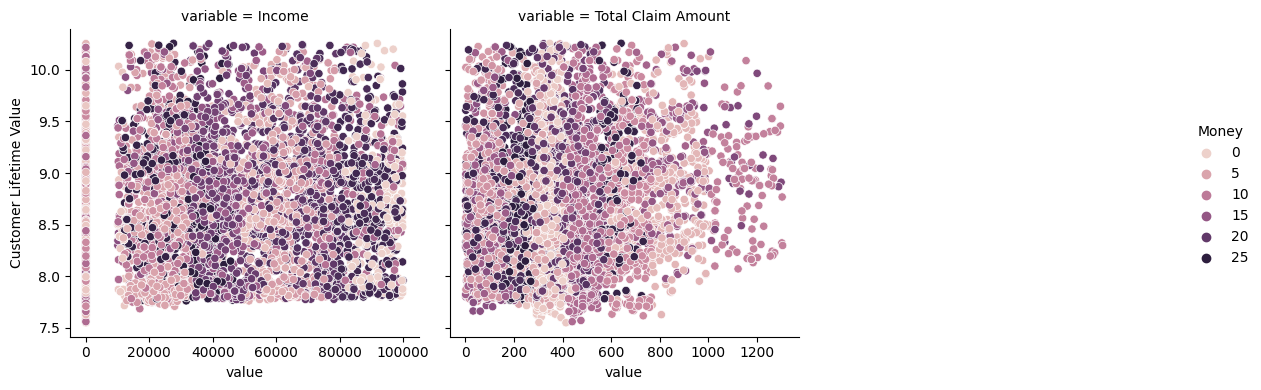

In [37]:
money_df = clusterize(cluster_df,['Income' ,'Total Claim Amount'],'Money',26,graph=True)
#num_of_clusters(10,cluster_df,['Income' ,'Total Claim Amount'],'Money',18,graph=False)
money_cluster_models = model_tests(money_df, all_models)

['Income', 'Total Claim Amount']
26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.526801974807636
Lasso Test Score:  0.5410390563363244
Elastic Net Train Score:  0.5449698394493601
Elastic Net Test Score:  0.5579193255822191
GLM Train and Test


0.5281762420292039

0.5228554671954981

DT Training Score:  0.2760842837631992
DT Test Score:  0.2736711273293026
DT best params:  {'max_depth': 13, 'max_leaf_nodes': 4}
RT Training Score:  0.38534822425671156
RT Test Score:  0.37302811263578967
RT best params:  {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.2278002331079906
BT Test Score:  0.21714161937076842
BT best params:  {'learning_rate': 0.05, 'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


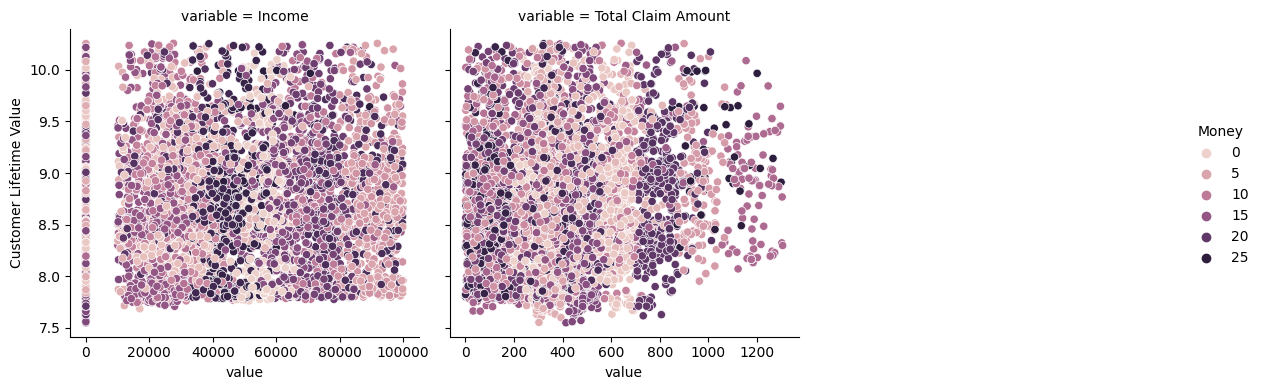

In [38]:
money_bar_df = clusterize(cluster_df,['Income' ,'Total Claim Amount'],
                      'Money',26,graph=True,eda=bar_eda)
money_bar_cluster_models = model_tests(money_bar_df, all_models)

['Income', 'Total Claim Amount']
26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lasso Train Score:  0.5456910987455815
Lasso Test Score:  0.5535367571781347
Elastic Net Train Score:  0.5460187088323729
Elastic Net Test Score:  0.5538514599882369
GLM Train and Test


0.5436641644861219

0.5495417036624081

DT Training Score:  0.5463884853981206
DT Test Score:  0.5520035006751408
DT best params:  {'max_depth': 7, 'max_leaf_nodes': 4}
RT Training Score:  0.5514312927534739
RT Test Score:  0.5547971160126837
RT best params:  {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.5404187697522063
BT Test Score:  0.5453721007571363
BT best params:  {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


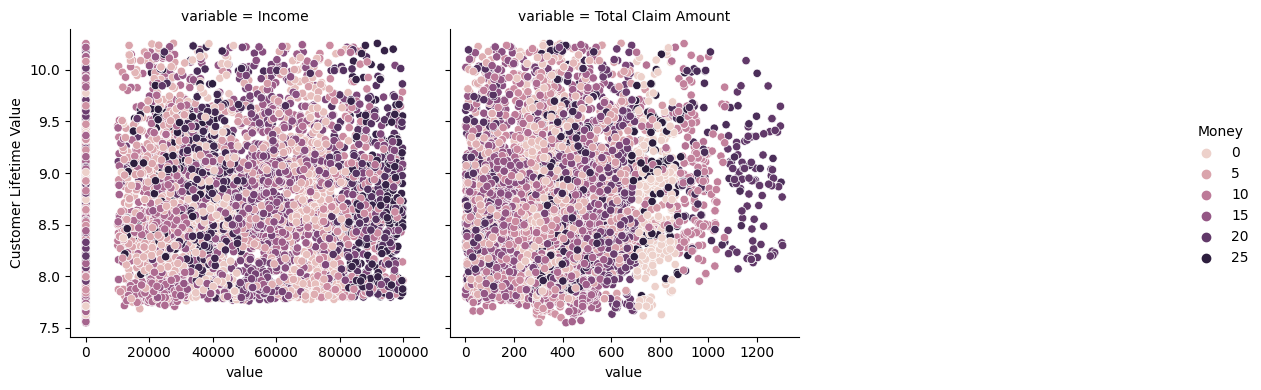

In [39]:
money_box_df = clusterize(cluster_df,['Income' ,'Total Claim Amount'],
                      'Money',26,graph=True,eda=box_eda)
money_box_cluster_models = model_tests(money_box_df, all_models)

Cost and Vehicle

In [40]:
import itertools

# K-means clustering
# takes df, names of the variables, new variable name, number of clusters
# Returns dataframe with new cluster variables
def clusterize_many(df, multiple_clust, cluster_names,n_clusters,eda=None):

  new_df = df.copy()

  names = list(itertools.chain.from_iterable(multiple_clust))
  print(names)

  if eda != None:
    # combine the eda vars with the selected cluster vars
    combined_vars = eda + list(set(names) - set(eda))
    #print(combined_vars)

    # remove all other vars so it is just eda and cluster vars
    new_df = new_df[new_df.columns.intersection(combined_vars)]
    #print(new_df.columns)

  for i in range(0,len(n_clusters)):

    # Scaling variables
    X_scaled = new_df.loc[:, multiple_clust[i]]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

    # creating clusters
    kmeans = KMeans(n_clusters = n_clusters[i],max_iter=1000)
    new_df[cluster_names[i]] = kmeans.fit_predict(X_scaled)
    new_df[cluster_names[i]] = label_encoder.fit_transform(new_df[cluster_names[i]])


  # Dropping original vars
  new_df = new_df.drop(names, axis=1)

  return new_df

In [41]:
# cluster
multiple_clust = [['Total Claim Amount','Months Since Last Claim'],['Vehicle Class','Vehicle Size']]
cluster_names = ['Cost','Vehicle']
n_clusters = [20,16]

final_df = clusterize_many(df, multiple_clust, cluster_names,n_clusters,eda=None)
print(final_df.columns)

final_models = model_tests(final_df, all_models)

['Total Claim Amount', 'Months Since Last Claim', 'Vehicle Class', 'Vehicle Size']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Cost', 'Vehicle'],
      dtype='object')
Lasso Train Score:  0.5256630291799377
Lasso Test Score:  0.5413100230815878
Elastic Net Train Score:  0.5444664562744932
Elastic Net Test Score:  0.5567520865777182
GLM Train and Test


0.5268598844475965

0.5224340439789162

DT Training Score:  0.27761287520308864
DT Test Score:  0.2713955722601855
DT best params:  {'max_depth': 5, 'max_leaf_nodes': 4}
RT Training Score:  0.4253776110047022
RT Test Score:  0.42022778930670585
RT best params:  {'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.2590912591553236
BT Test Score:  0.2513246426163974
BT best params:  {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


In [42]:
final_eda_df = clusterize_many(df, multiple_clust,cluster_names,n_clusters,eda=bar_eda)
print(final_eda_df.columns)

final_eda_models = model_tests(final_eda_df, all_models)

['Total Claim Amount', 'Months Since Last Claim', 'Vehicle Class', 'Vehicle Size']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['Customer Lifetime Value', 'Coverage', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Renew Offer Type',
       'Cost', 'Vehicle'],
      dtype='object')
Lasso Train Score:  0.5303567253959658
Lasso Test Score:  0.5256526199309145
Elastic Net Train Score:  0.5492339850577428
Elastic Net Test Score:  0.5404632757431856
GLM Train and Test


0.5250898116467783

0.5356105309315089

DT Training Score:  0.27550618437007957
DT Test Score:  0.28264878304909286
DT best params:  {'max_depth': 4, 'max_leaf_nodes': 4}
RT Training Score:  0.3558364764700877
RT Test Score:  0.35371457152833635
RT best params:  {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
BT Training Score:  0.20599530203691935
BT Test Score:  0.21702959756526985
BT best params:  {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}
